In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [0]:
# load data
df_battles = pd.read_csv('https://raw.githubusercontent.com/drbenesch/NBP-ACC-week-11-acc_8/master/battles.csv?token=AIIS4GDTLJCSSKBBGKPKRCS5CYJDA')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/drbenesch/NBP-ACC-week-11-acc_8/master/character-deaths.csv?token=AIIS4GD4OPDATFDKRYHO4Q25CYJG2')
df_pred = pd.read_csv('https://raw.githubusercontent.com/drbenesch/NBP-ACC-week-11-acc_8/master/character-predictions.csv?token=AIIS4GEKEUESL2Q3FMPJH5K5CYJMI')

In [0]:
# print data
pd.set_option('display.max_columns', 500)
print('battles')
print(df_battles.head(3))

battles
                          name  year  battle_number             attacker_king  \
0   Battle of the Golden Tooth   298              1  Joffrey/Tommen Baratheon   
1  Battle at the Mummer's Ford   298              2  Joffrey/Tommen Baratheon   
2           Battle of Riverrun   298              3  Joffrey/Tommen Baratheon   

  defender_king attacker_1 attacker_2 attacker_3 attacker_4 defender_1  \
0    Robb Stark  Lannister        NaN        NaN        NaN      Tully   
1    Robb Stark  Lannister        NaN        NaN        NaN  Baratheon   
2    Robb Stark  Lannister        NaN        NaN        NaN      Tully   

  defender_2  defender_3  defender_4 attacker_outcome     battle_type  \
0        NaN         NaN         NaN              win  pitched battle   
1        NaN         NaN         NaN              win          ambush   
2        NaN         NaN         NaN              win  pitched battle   

   major_death  major_capture  attacker_size  defender_size  \
0          1.0

In [0]:
print('deaths')
print(df_deaths.head(3))

deaths
                      Name      Allegiances  Death Year  Book of Death  \
0           Addam Marbrand        Lannister         NaN            NaN   
1  Aegon Frey (Jinglebell)             None       299.0            3.0   
2          Aegon Targaryen  House Targaryen         NaN            NaN   

   Death Chapter  Book Intro Chapter  Gender  Nobility  GoT  CoK  SoS  FfC  \
0            NaN                56.0       1         1    1    1    1    1   
1           51.0                49.0       1         1    0    0    1    0   
2            NaN                 5.0       1         1    0    0    0    0   

   DwD  
0    0  
1    0  
2    1  


In [0]:
print('predictions')
print(df_pred.head(3))

predictions
   S.No  actual  pred  alive   plod                  name  \
0     1       0     0  0.054  0.946  Viserys II Targaryen   
1     2       1     0  0.387  0.613           Walder Frey   
2     3       1     0  0.493  0.507          Addison Hill   

                  title  male   culture  dateOfBirth  DateoFdeath  \
0                   NaN     1       NaN          NaN          NaN   
1  Lord of the Crossing     1  Rivermen        208.0          NaN   
2                   Ser     1       NaN          NaN          NaN   

               mother            father                heir        house  \
0  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen          NaN   
1                 NaN               NaN                 NaN   House Frey   
2                 NaN               NaN                 NaN  House Swyft   

        spouse  book1  book2  book3  book4  book5  isAliveMother  \
0          NaN      0      0      0      0      0            1.0   
1  Perra Royce      1    

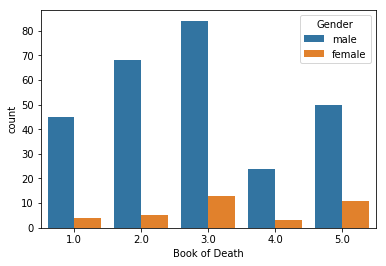

In [0]:
#sns.boxplot("attacker_1","attacker_outcome",data=df_battles)

df_deaths['Gender'] = df_deaths['Gender'].replace({0: 'female', 1:'male'})

sns.countplot(x='Book of Death', hue='Gender', data=df_deaths)


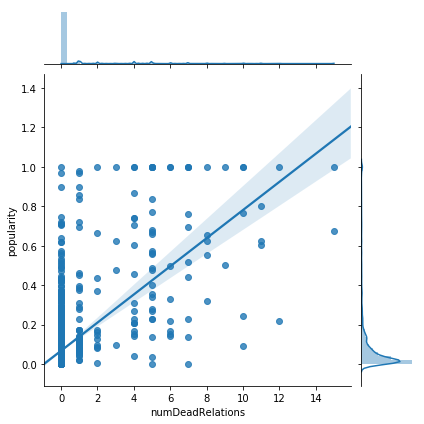

In [0]:
sns.jointplot("numDeadRelations", "popularity", data=df_pred, kind="reg")

F_onewayResult(statistic=67.52811579473224, pvalue=3.7475102372393455e-16)


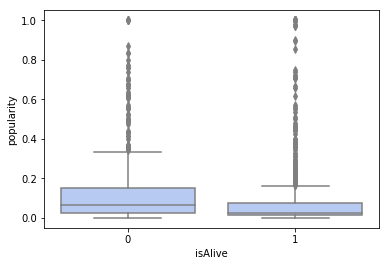

In [0]:
sns.boxplot("isAlive", "popularity", data=df_pred, 
             palette=["#ADC7FB"]) 

results = stats.f_oneway(df_pred[df_pred["isAlive"]==0]["popularity"],df_pred[df_pred["isAlive"]==1]["popularity"])
print(results)

In [0]:

df_battles.dropna(axis=0, how='any', subset=['name', 'attacker_king', 'defender_king', 'attacker_outcome', 'attacker_size', 'defender_size'])
df_battles.to_csv('battles1.csv', index = False)
#battles_clean = pd.read_csv('battles1.csv')
print(df_battles)

                                                 name  year  battle_number  \
0                          Battle of the Golden Tooth   298              1   
1                         Battle at the Mummer's Ford   298              2   
2                                  Battle of Riverrun   298              3   
3                            Battle of the Green Fork   298              4   
4                       Battle of the Whispering Wood   298              5   
5                                 Battle of the Camps   298              6   
6                                       Sack of Darry   298              7   
7                               Battle of Moat Cailin   299              8   
8                            Battle of Deepwood Motte   299              9   
9                           Battle of the Stony Shore   299             10   
10                         Battle of Torrhen's Square   299             11   
11                               Battle of Winterfell   299     

battles plots

Text(53.49933333333331, 0.5, 'Battle')

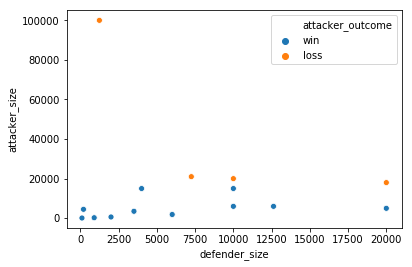

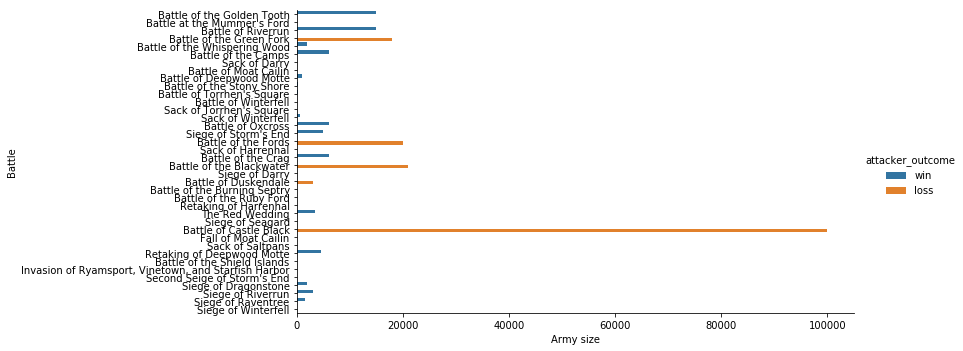

In [0]:
# attecker size to defender size
ax = sns.scatterplot(x="defender_size", y="attacker_size", hue="attacker_outcome",data=df_battles)



sns.catplot(x = "attacker_size", y = "name", hue='attacker_outcome',data= df_battles, kind="bar", aspect=2.5)
plt.xlabel("Army size")
plt.ylabel("Battle")

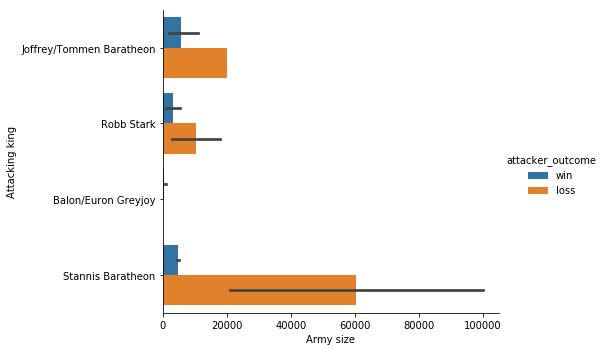

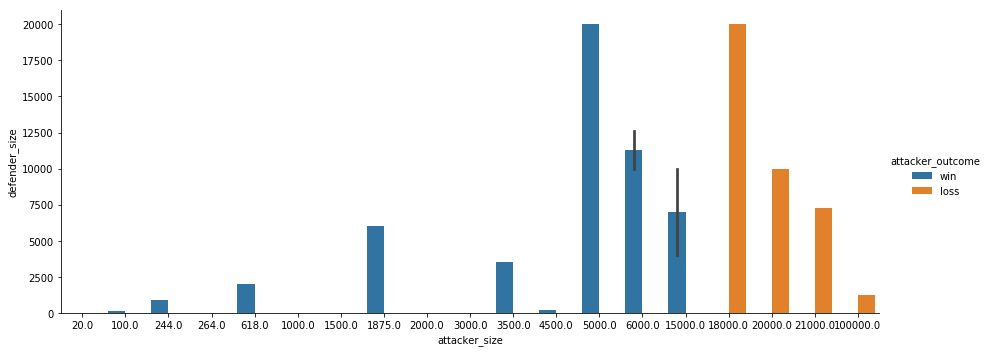

In [0]:
sns.catplot(x = "attacker_size", y = "attacker_king", hue='attacker_outcome',data= df_battles, kind="bar", aspect=1.5)
plt.xlabel("Army size")
plt.ylabel("Attacking king")

sns.catplot(x = "attacker_size", y = "defender_size", hue='attacker_outcome',data= df_battles, kind="bar", aspect=2.5)

##CONCLUSIONS
## The more attackers size you have, more likely you loose. If an attacker gets a bigger army, he's more likely to loose.
##The number of defenders is generally lower than the number of defenders,
## being a character of GoT a better strategy is to defend.
## Overall most battles in the series ended with wiining. -> most attackers tended to attack with the small army

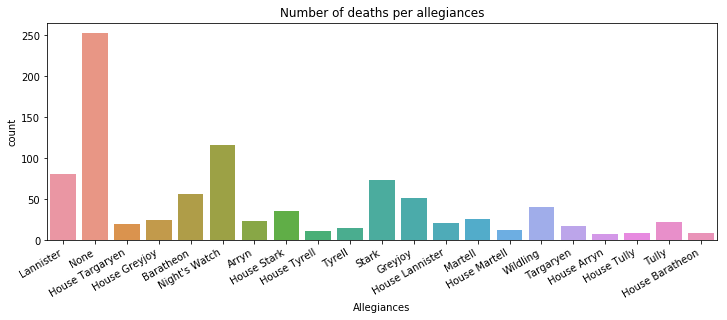

In [0]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df_deaths['Allegiances'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.title('Number of deaths per allegiances')
#plt.tight_layout()
plt.show()

##Conclusions
# It is more likely that a character dies if he/she does not belong to a certain allegiance